In [39]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.svm import SVC
%matplotlib inline 
import plotly.express as px
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
clf_data = pd.read_csv('/content/gdrive/MyDrive/MACHINE LEARNING ALGORITHM 1/14-K-Nearest-Neighbors/Classified Data',index_col=0)

In [5]:
clf_data.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [6]:
clf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
clf_data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [8]:
clf_data.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [18]:
x = clf_data.drop(['TARGET CLASS'],axis=1)

In [19]:
y = clf_data['TARGET CLASS']

In [20]:
sd = StandardScaler().fit(x)
x_feature = sd.transform(x)

In [22]:
x_feature = pd.DataFrame(x_feature,index=x.index,columns=x.columns)

In [24]:
x_feature

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_feature,y,test_size=0.3,random_state=101)

In [55]:
knn = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [56]:
print('CLASSIFICATION REPORT FOR KNN K=1 :\n{}'.format(classification_report(y_test,prediction)))

CLASSIFICATION REPORT FOR KNN K=1 :
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



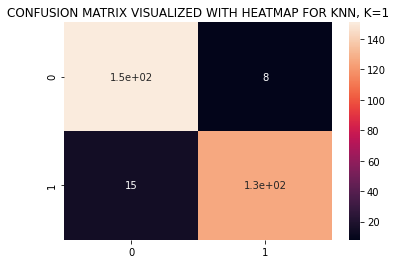

In [57]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)
plt.title('CONFUSION MATRIX VISUALIZED WITH HEATMAP FOR KNN, K=1')
plt.show()

In [53]:
error_rate  =[]
for i in range(1,70):
  knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
  knn.fit(x_train,y_train)
  prediction = knn.predict(x_test)
  error_rate.append(np.mean(prediction!=y_test))


In [54]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1,70)),y=error_rate,mode='lines+markers',name='lines+markers'))
fig.show()

In [58]:
knn = KNeighborsClassifier(n_neighbors=40,n_jobs=-1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [59]:
print('CLASSIFICATION REPORT FOR KNN K=40 :\n{}'.format(classification_report(y_test,prediction)))

CLASSIFICATION REPORT FOR KNN K=40 :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [60]:
print('ACCURACY SCORE : {}'.format(accuracy_score(y_test,prediction)))

ACCURACY SCORE : 0.96


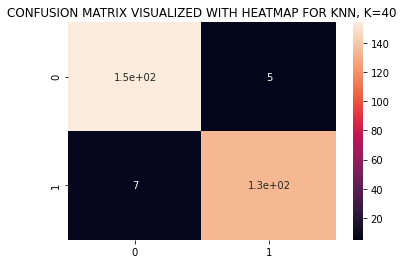

In [61]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)
plt.title('CONFUSION MATRIX VISUALIZED WITH HEATMAP FOR KNN, K=40')
plt.show()

**WE ACIEVE AN ACCURACY OF 96% WITH THE KNN MODEL FRO THE DATASET PROVIDED. A PROPER DATA ANALYSIS WAS PERFORMED**